#**Online Payment Fraud Detection**

Set de date disponibil la: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset/data

##Analiza datelor

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, f1_score
from collections import Counter

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/date_proiect_ecd/PS_20174392719_1491204439457_log.csv')

In [ ]:
def center_text(text, width, fillchar='-'):
    if len(text) >= width:
        return text
    padding_total = width - len(text)
    padding_left = padding_total // 2
    padding_right = padding_total - padding_left
    return f"{fillchar * padding_left}{text}{fillchar * padding_right}"

In [ ]:
print("--------------------------------------------------")
print(center_text("Analiza Exploratorie a Datelor",50, " "))
print("--------------------------------------------------\n")

print(center_text("Dimensiunea DataFrame-ului",50, '-'))
print(f"Numărul de rânduri: {df.shape[0]}")
print(f"Numărul de coloane: {df.shape[1]}")
print("--------------------------------------------------\n")

print(center_text("Informații despre DataFrame", 50 , '-'))
df.info()
print("--------------------------------------------------\n")

print(center_text("Numărul de valori lipsă în fiecare coloană",50, '-'))
print(df.isnull().sum())
print("--------------------------------------------------\n")

print(center_text("Numărul de valori unice în fiecare coloană",50, '-'))
unique_counts = df.nunique()
unique_percentages = (unique_counts / df.shape[0]) * 100
unique_df = pd.DataFrame({
    'Numărul de valori unice': unique_counts,
    'Procentaj de valori unice': unique_percentages
})
print(unique_df)
print("\n" + center_text("", 50, "=") + "\n")
print("--------------------------------------------------\n")

isfraud_counts = df['isFraud'].value_counts()
print(center_text("Distributia de valori în coloana 'isFraud'",50, '-'))
print(f"Legitime - L (isFraud=0): {isfraud_counts[0]}")
print(f"Frauduloase - F (isFraud=1): {isfraud_counts[1]}")
print(f"Raport F/L = {isfraud_counts[1]/isfraud_counts[0]}")
print("--------------------------------------------------\n")

print(center_text("Descriptive statistics for each column" ,50, '-'))
print(df.describe())
print("--------------------------------------------------")

--------------------------------------------------
          Analiza Exploratorie a Datelor          
--------------------------------------------------

------------Dimensiunea DataFrame-ului------------
Numărul de rânduri: 6362620
Numărul de coloane: 11
--------------------------------------------------

-----------Informații despre DataFrame------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
--------------------------------------------------

----Numărul de valori lipsă în fiec

In [ ]:
fraud_df = df[df['isFraud'] == 1]

nameDest_counts_fraud = fraud_df['nameDest'].value_counts()

nameDest_counts_total = df['nameDest'].value_counts()

comparison_df = pd.DataFrame({
    'Total_Count': nameDest_counts_total,
    'Fraud_Count': nameDest_counts_fraud
}).fillna(0).sort_values(by=['Fraud_Count', 'Total_Count'], ascending=False)

print(comparison_df)

             Total_Count  Fraud_Count
nameDest                             
C803116137            77          2.0
C410033330            48          2.0
C185805228            47          2.0
C2020337583           41          2.0
C1193568854           37          2.0
...                  ...          ...
M999998692             1          0.0
M99999900              1          0.0
M999999089             1          0.0
M999999543             1          0.0
M999999784             1          0.0

[2722362 rows x 2 columns]


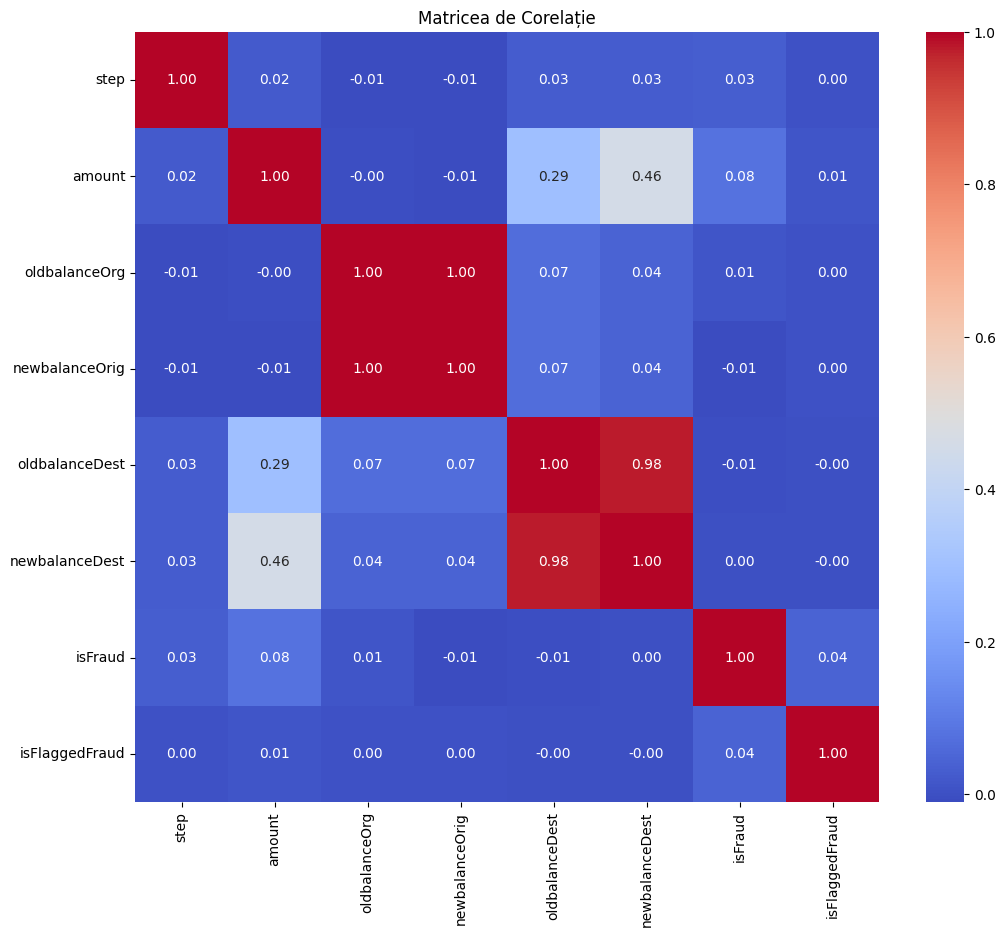

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matricea de Corelație')
plt.show()

correlation_matrix

În urma analizei datelor, vom urma următorii pași de preprocesare:

* Eliminăm coloana nameOrig și nameDest din cauza procentului foarte mare de valori unice.
* Eliminăm newBalanceOrig sau oldBalanceOrig din cauza corelației egală cu 1.
* Codificăm coloana type folosind One-Hot Encoding.
* Normalizăm coloanele numerice (amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest).
* Împărțim setul de date în seturi de antrenament și testare.
* Aplicăm tehnici de echilibrare a claselor, cum ar fi oversampling, undersampling sau SMOTE (se urmărește copararea acestor metode).

In [ ]:
df.drop(columns=['nameOrig', 'nameDest', 'newbalanceDest'], inplace=True)

categorical_features = ['type']
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X = df.drop('isFraud', axis=1)
y = df['isFraud']
X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2001, stratify=y)


In [ ]:


models = {
    'RandomForest': RandomForestClassifier(random_state=2001),
    'LogisticRegression': LogisticRegression(random_state=2001, max_iter=1000),
    'GradientBoosting': GradientBoostingClassifier(random_state=2001)
}

# Funcție pentru antrenarea și evaluarea modelului
def train_and_evaluate(X_train, y_train, X_test, y_test, model, balance_method=None):
    print(f"Numărul de elemente înainte de echilibrare: {Counter(y_train)}")

    if balance_method:
        X_res, y_res = balance_method.fit_resample(X_train, y_train)
        print(f"Numărul de elemente după aplicarea {balance_method.__class__.__name__}: {Counter(y_res)}")
        pipeline = Pipeline([
            ('classifier', model)
        ])
        pipeline.fit(X_res, y_res)
    else:
        pipeline = Pipeline([
            ('classifier', model)
        ])
        pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print(f"Model: {model.__class__.__name__}, Balance Method: {balance_method.__class__.__name__ if balance_method else 'None'}")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
    print("--------------------------------------------------\n")

    return accuracy, auc, precision, f1, tp, fp, tn, fn


results = []
for balance_method, method_name in zip([ SMOTE(random_state=2001), RandomOverSampler(random_state=2001), RandomUnderSampler(random_state=2001)],
                                       [ 'SMOTE', 'Oversampling', 'Undersampling']):
    for model_name, model in models.items():
        print(f"\nEvaluare pentru modelul {model_name} cu metoda de echilibrare {method_name}")
        accuracy, auc, precision, f1, tp, fp, tn, fn = train_and_evaluate(X_train, y_train, X_test, y_test, model, balance_method)
        results.append({
            'model': model_name,
            'balance_method': method_name,
            'accuracy': accuracy,
            'auc': auc,
            'precision': precision,
            'f1': f1,
            'TP': tp,
            'FP': fp,
            'TN': tn,
            'FN': fn
        })

final_results = pd.DataFrame(results)


final_results.to_csv('/content/drive/MyDrive/date_proiect_ecd/final_results_with_confusion.csv', index=False)

print("Evaluarea completată. Rezultatele finale:")

print(final_results)



Evaluare pentru modelul RandomForest cu metoda de echilibrare SMOTE
Numărul de elemente înainte de echilibrare: Counter({0: 5083526, 1: 6570})
Numărul de elemente după aplicarea SMOTE: Counter({0: 5083526, 1: 5083526})


KeyboardInterrupt: 

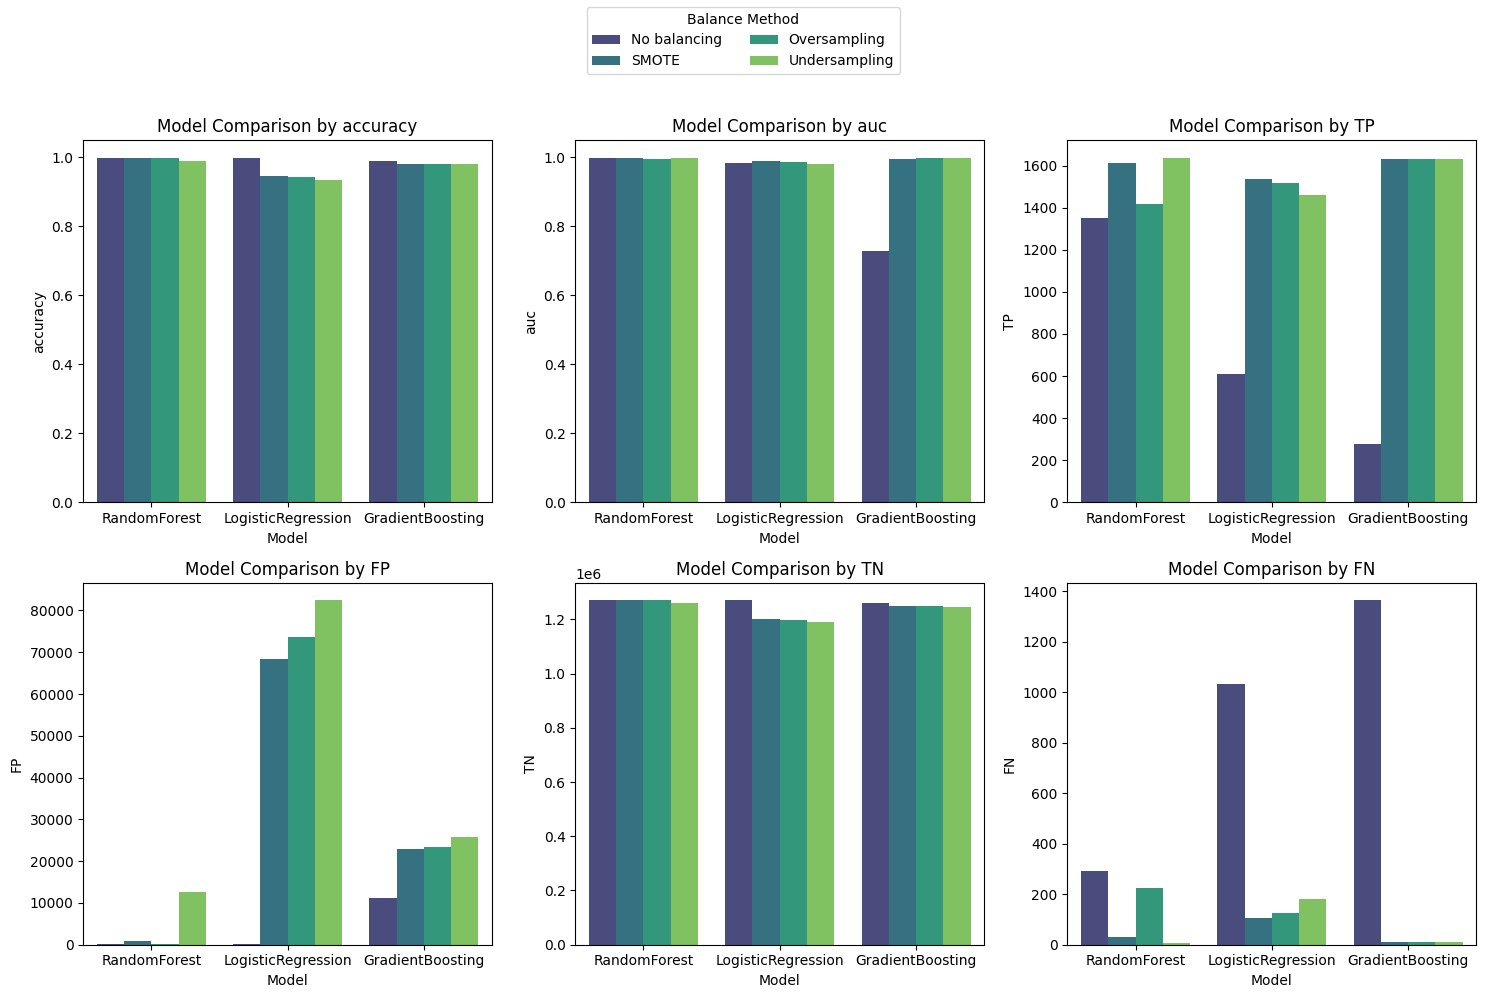

In [ ]:
final_results = pd.read_csv('/content/drive/MyDrive/date_proiect_ecd/final_results_with_confusion.csv')



metrics = ['accuracy', 'auc', 'TP', 'FP', 'TN', 'FN']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

colors = sns.mpl_palette("viridis", 4)

for ax, metric in zip(axes.flat, metrics):
    sns.barplot(data=final_results, x='model', y=metric, hue='balance_method', ax=ax, palette=colors)
    ax.set_title(f'Model Comparison by {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, title='Balance Method')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()